# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from  sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV,LeaveOneOut
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures ,OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.compose import make_column_transformer, make_column_selector
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay,precision_recall_curve,roc_curve,RocCurveDisplay,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier


In [2]:
df = pd.read_csv('./data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
#dropping duration
df.drop(columns='duration',inplace=True)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [6]:
#Check for duplicates
duplicate_count = df.duplicated().sum()
duplicate_count

1784

In [7]:
#drop duplicate rows inplace
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Missing values 
Next create a pandas dataframe to hold the missing value summary 

In [8]:
df.isnull().sum()
na_cols=df.columns[df.isna().any()].tolist()
 # Missing values summary
mv=pd.DataFrame(df[na_cols].isna().sum(), columns=['Number_missing'])
desc = pd.DataFrame(index = list(df))
desc['count'] = df.count()
desc['nunique'] = df.nunique()
desc['%unique'] = desc['nunique'] / len(df) * 100
desc['null'] = df.isnull().sum()
desc['Percentage_missing']=np.round(100*mv['Number_missing']/len(df),2)
desc['type'] = df.dtypes
desc = pd.concat([desc, df.describe().T.drop('count', axis = 1)], axis = 1)
desc

,count,nunique,%unique,null,Percentage_missing,type,mean,std,min,25%,50%,75%,max
age,39404,78,0.197949,0,NaN,int64,40.116105,10.460328,17.000,32.000,38.000,47.000,98.000
job,39404,12,0.030454,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,39404,4,0.010151,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,39404,8,0.020303,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,39404,3,0.007613,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,39404,3,0.007613,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,39404,3,0.007613,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,39404,2,0.005076,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,39404,10,0.025378,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,39404,5,0.012689,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Use imputation to fill missing values 

In [9]:
def impute(x):
    df[x].replace('unknown',df[x].value_counts().index[0],inplace=True)
for x in ['default','housing','loan']:
        impute(x)


In [10]:
df[['default','housing','loan']].value_counts()

default  housing  loan
no       yes      no      17896
         no       no      15329
         yes      yes      3644
         no       yes      2532
yes      no       no          2
         yes      no          1
Name: count, dtype: int64

Map target column values to 0 and 1. 

In [11]:
df['y'].replace({'yes':1,'no':0},inplace=True)

## EDA Exploratary Data Analysis 


Check for correlation of numerical columns

In [12]:
df.select_dtypes('number').corr()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.000990,-0.033556,0.022051,0.002199,0.000954,0.128851,0.012970,-0.014800,0.028196
campaign,0.000990,1.000000,0.056527,-0.084663,0.158225,0.128093,-0.014252,0.142438,0.152535,-0.072371
pdays,-0.033556,0.056527,1.000000,-0.588981,0.273821,0.080392,-0.092785,0.300021,0.375664,-0.325062
previous,0.022051,-0.084663,-0.588981,1.000000,-0.422050,-0.203900,-0.049526,-0.456498,-0.503055,0.229706
emp.var.rate,0.002199,0.158225,0.273821,-0.422050,1.000000,0.776480,0.187151,0.971919,0.905359,-0.298055
cons.price.idx,0.000954,0.128093,0.080392,-0.203900,0.776480,1.000000,0.054682,0.687596,0.519677,-0.137115
cons.conf.idx,0.128851,-0.014252,-0.092785,-0.049526,0.187151,0.054682,1.000000,0.270182,0.092497,0.057146
euribor3m,0.012970,0.142438,0.300021,-0.456498,0.971919,0.687596,0.270182,1.000000,0.944573,-0.307860
nr.employed,-0.014800,0.152535,0.375664,-0.503055,0.905359,0.519677,0.092497,0.944573,1.000000,-0.354145
y,0.028196,-0.072371,-0.325062,0.229706,-0.298055,-0.137115,0.057146,-0.307860,-0.354145,1.000000


Plot heatmap of correlation w.r.t numerical columns

<Axes: >

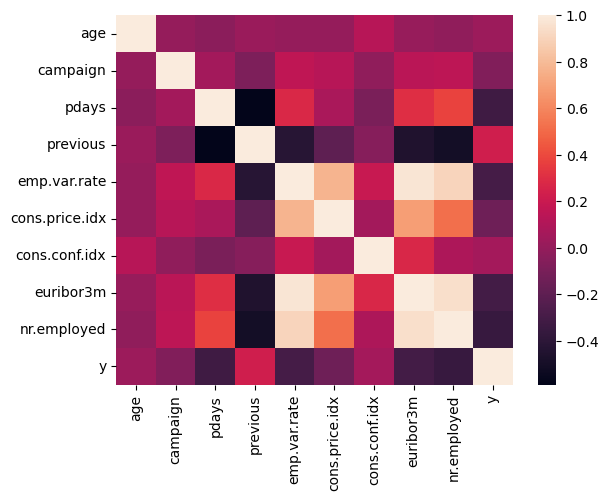

In [13]:
sns.heatmap(df.select_dtypes('number').corr())

Look at the distribution of numerical features using distplot

/var/folders/fn/gqsn1b5x75x3nstgrhp06xtw0000gp/T/ipykernel_18068/3174330196.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x])
/var/folders/fn/gqsn1b5x75x3nstgrhp06xtw0000gp/T/ipykernel_18068/3174330196.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x])
/var/folders/fn/gqsn1b5x75

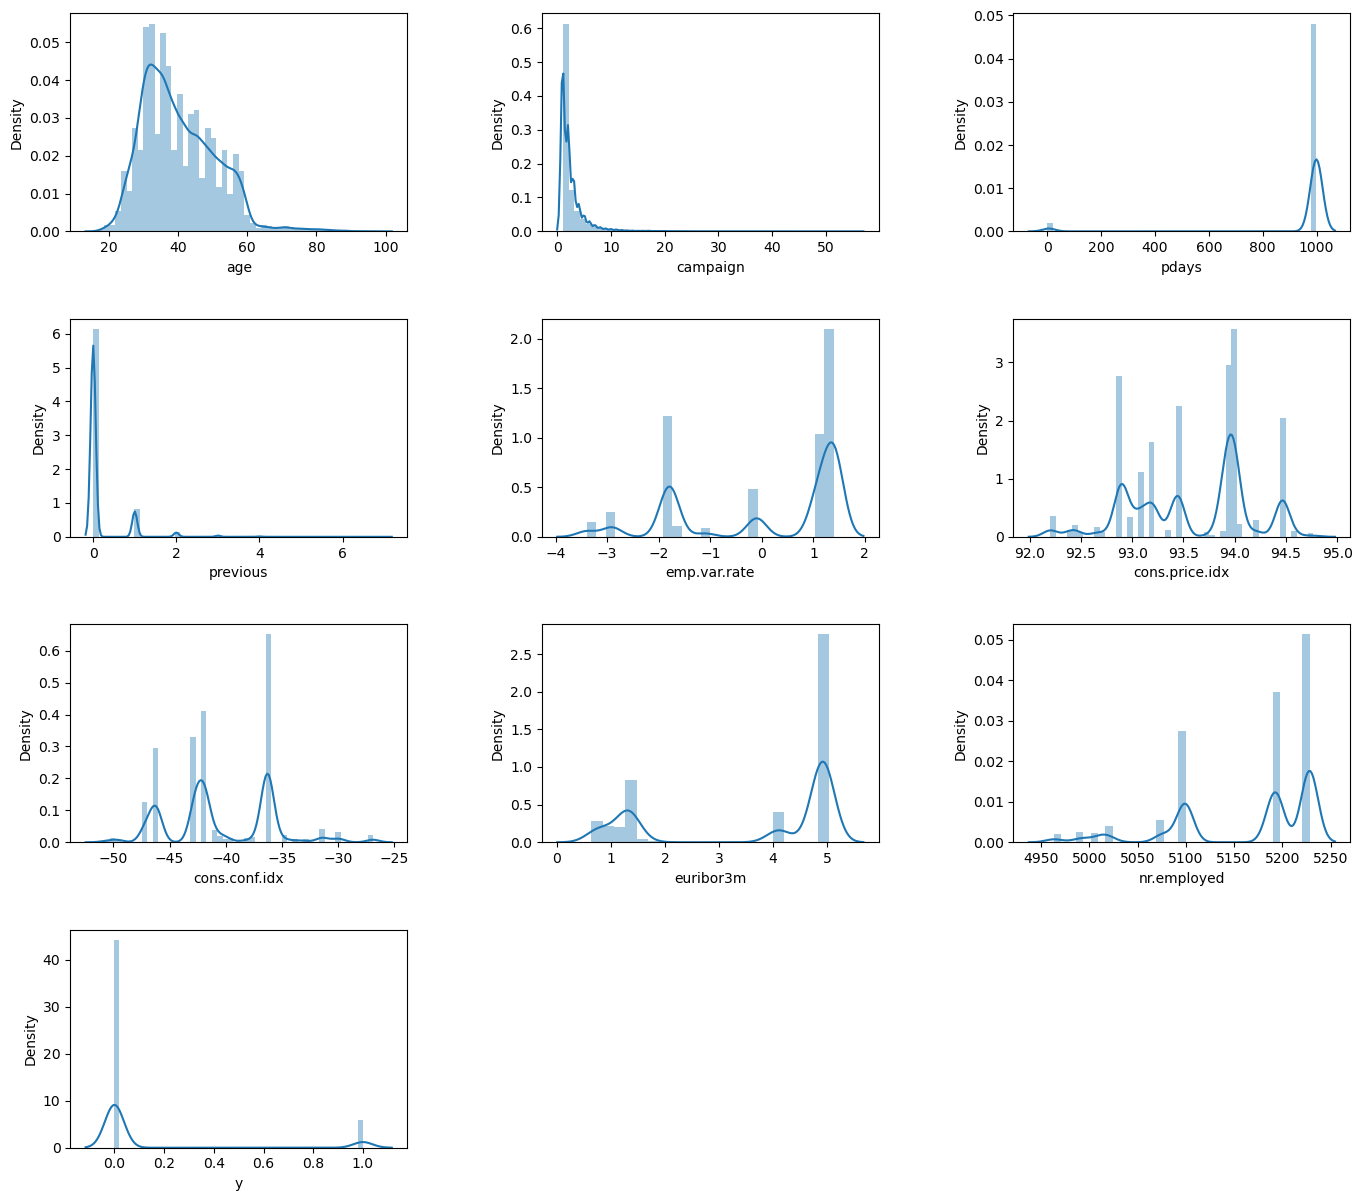

In [14]:
i=1
for x in df.select_dtypes('number').columns:
  
    plt.subplot(5,3,i)
    sns.distplot(df[x])
    plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)
    i = i+1


compare the different categorical features by using boxplot with price as y axis

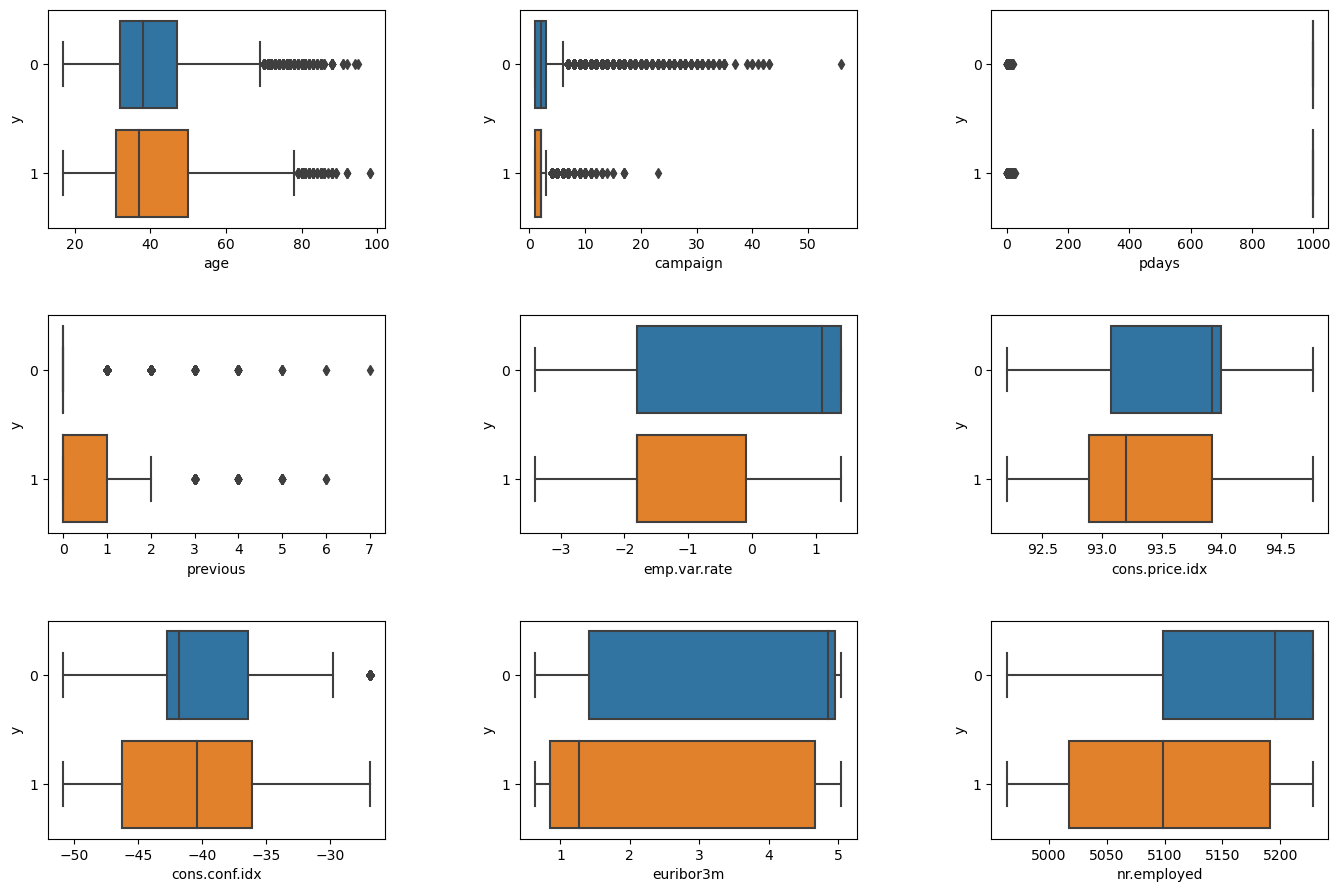

In [15]:
i=1
for x in df.select_dtypes('number').columns:
    if(x != 'y'):
        plt.subplot(5,3,i)
        sns.boxplot(y=df['y'].astype('category'),x=df[x])
        plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)
        i = i+1


Count plot of categorical  columns with respect to target column 

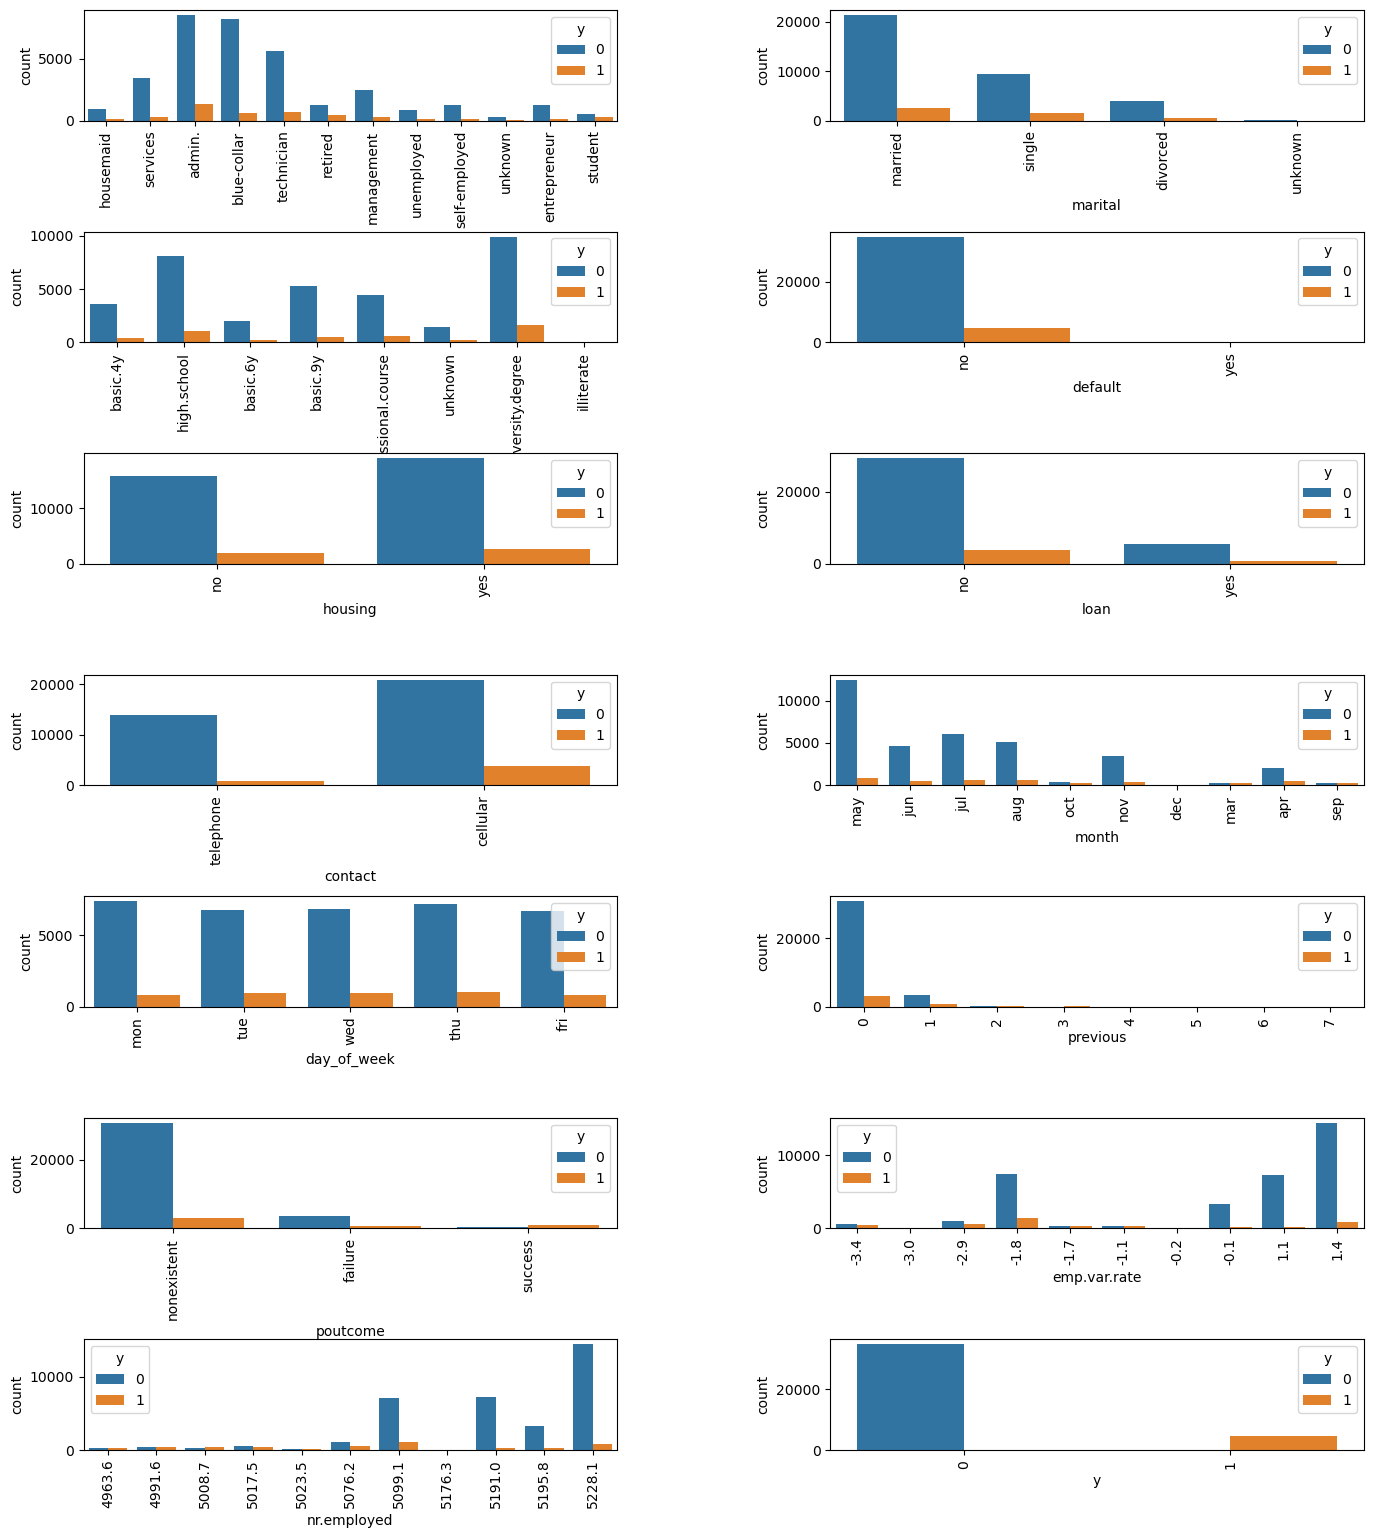

In [16]:
i=1
for x in desc.query('nunique < 14').index:
    plt.subplot(7,2,i)
    sns.countplot(df,x=x,hue='y')
    plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=1.0)
    plt.xticks(rotation=90)
    i = i+1

Finding mean of numerical columns against categorical columns

In [17]:
for x in desc.query('nunique < 14').index:
    display(df.groupby(x)[df.select_dtypes('number').columns].mean())


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,
admin.,38.343361,2.683784,951.834701,0.197204,-0.013886,93.535209,-40.244029,3.516736,5162.413350,0.135217
blue-collar,39.574986,2.615393,984.504018,0.125523,0.245286,93.659643,-41.358087,3.768478,5175.344561,0.071647
entrepreneur,41.648399,2.575089,980.623488,0.140214,0.160498,93.608519,-41.261423,3.791033,5176.261922,0.086121
housemaid,45.535019,2.678988,959.383268,0.142023,0.409825,93.676461,-39.499903,3.984798,5178.305156,0.103113
management,42.397163,2.515248,961.306383,0.190780,-0.021596,93.527668,-40.471560,3.599011,5165.892376,0.115603
retired,62.039216,2.500297,895.714201,0.334522,-0.714379,93.431062,-38.550683,2.748920,5121.159002,0.256090
self-employed,39.999278,2.692641,976.056277,0.147186,0.093651,93.562796,-40.466162,3.690420,5170.543434,0.107504
services,37.991055,2.641936,979.133123,0.159695,0.160747,93.634558,-41.277637,3.682842,5170.788661,0.084715
student,25.907277,2.129108,837.099765,0.537559,-1.432629,93.330595,-40.152347,1.854793,5084.326291,0.318075


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
marital,,,,,,,,,,
divorced,44.912312,2.651267,967.598116,0.173133,0.147432,93.606340,-40.700673,3.696907,5169.964185,0.105853
married,42.395995,2.623151,965.838912,0.160208,0.170258,93.599631,-40.268796,3.730951,5171.065508,0.105409
single,33.220697,2.591707,947.451214,0.220515,-0.198027,93.518669,-40.916314,3.283143,5153.417750,0.145312
unknown,40.417722,3.215190,936.316456,0.278481,-0.241772,93.471595,-40.879747,3.292127,5156.498734,0.151899


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,
basic.4y,47.710744,2.657150,964.179063,0.153018,0.194766,93.658805,-40.239093,3.728182,5169.012021,0.106436
basic.6y,40.450495,2.591359,979.781278,0.132763,0.216697,93.648626,-41.146085,3.756534,5174.084923,0.084608
basic.9y,39.164218,2.584270,978.412446,0.143820,0.160985,93.626924,-41.278583,3.701216,5172.219430,0.080553
high.school,38.060410,2.618024,962.861967,0.191536,0.019526,93.586179,-40.917487,3.540604,5164.133757,0.112159
illiterate,48.500000,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.208051,2.636708,959.051614,0.167995,0.148665,93.571582,-40.152591,3.683666,5168.817258,0.117975
university.degree,38.992475,2.619583,949.329902,0.201107,-0.057106,93.495716,-39.990027,3.496729,5161.548093,0.142808
unknown,43.417556,2.630486,941.331554,0.230130,0.043001,93.656753,-39.863938,3.553222,5158.731732,0.147687


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
default,,,,,,,,,,
no,40.115936,2.618842,960.844192,0.178726,0.064003,93.577555,-40.499789,3.60116,5165.982572,0.116698
yes,42.333333,1.333333,999.000000,0.333333,0.900000,93.362667,-38.066667,4.69300,5217.333333,0.000000


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
housing,,,,,,,,,,
no,40.112803,2.649555,963.152270,0.166377,0.168936,93.626734,-40.339187,3.715320,5169.762526,0.112635
yes,40.118843,2.593194,958.935518,0.188988,-0.022896,93.536742,-40.632631,3.506644,5162.855174,0.120050


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
loan,,,,,,,,,,
no,40.160497,2.619327,960.630733,0.180059,0.060639,93.579189,-40.469766,3.598700,5165.703079,0.117852
yes,39.877267,2.615609,962.011172,0.171632,0.082513,93.568655,-40.660136,3.614927,5167.511237,0.110427


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
contact,,,,,,,,,,
cellular,40.102947,2.462733,942.614802,0.264662,-0.430219,93.309569,-41.398188,3.047361,5150.128266,0.154460
telephone,40.138144,2.880049,991.384427,0.034825,0.891949,94.026360,-38.994562,4.528941,5192.547458,0.053425


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
month,,,,,,,,,,
apr,40.736884,1.973176,953.926233,0.330178,-1.800000,93.120997,-46.246943,1.359688,5092.930690,0.209862
aug,41.896660,2.764644,958.191467,0.124497,0.706365,93.303235,-35.567564,4.258729,5198.467564,0.113831
dec,47.441989,2.160221,746.674033,0.618785,-2.845304,92.715376,-33.712707,0.866188,5031.941989,0.486188
jul,39.165721,3.275455,981.542401,0.050463,1.142431,93.893499,-42.348089,4.666645,5213.104807,0.096297
jun,39.807626,3.094757,969.820972,0.084271,0.691363,94.246720,-41.579600,4.258853,5197.546711,0.105624
mar,40.669811,2.226415,830.516981,0.498113,-1.800000,93.105008,-42.428679,1.147762,5054.070566,0.505660
may,39.072850,2.474202,980.510777,0.166429,-0.160623,93.531049,-40.561322,3.298546,5149.611941,0.066241
nov,41.090281,1.941176,950.700767,0.304092,-0.430665,93.201553,-41.213734,3.707497,5172.101407,0.105115
oct,43.947666,1.554455,778.531825,0.652051,-2.423621,93.186685,-34.700424,1.207314,5018.844413,0.441301


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
day_of_week,,,,,,,,,,
fri,40.258244,2.767316,966.653159,0.181963,0.016687,93.580787,-40.535969,3.549496,5164.206026,0.111244
mon,40.483146,2.684783,961.535418,0.175623,0.012396,93.579206,-40.895371,3.525758,5163.793442,0.102833
thu,39.722825,2.659754,957.449189,0.181042,0.037941,93.557808,-40.739941,3.551795,5165.427290,0.126510
tue,40.493383,2.478853,957.768682,0.179943,0.108355,93.579000,-40.022704,3.679648,5167.365439,0.122600
wed,39.631186,2.500129,961.118170,0.175258,0.148299,93.592007,-40.266456,3.705596,5169.253943,0.120361


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
previous,,,,,,,,,,
0,40.058420,2.725560,999.000000,0.0,0.367136,93.649963,-40.314661,3.947336,5180.552227,0.091588
1,40.134255,1.983720,807.673506,1.0,-1.738782,93.047188,-42.234679,1.624794,5090.899264,0.215210
2,42.160904,1.908245,464.281915,2.0,-2.084707,93.351344,-38.857846,0.939322,5029.101995,0.465426
3,40.375000,1.888889,235.722222,3.0,-1.841204,93.798843,-39.075000,0.843843,4996.031019,0.592593
4,43.371429,1.800000,176.157143,4.0,-1.558571,94.043829,-40.244286,0.845943,4988.304286,0.542857
5,38.722222,1.833333,115.000000,5.0,-1.466667,94.171667,-41.477778,0.844278,4984.855556,0.722222
6,53.000000,1.800000,201.800000,6.0,-1.460000,94.323000,-43.300000,0.958400,4980.400000,0.600000
7,51.000000,1.000000,3.000000,7.0,-1.100000,94.767000,-50.800000,1.049000,4963.600000,0.000000


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
poutcome,,,,,,,,,,
failure,39.951605,2.018448,965.358888,1.171299,-1.686057,93.069722,-42.692022,1.649993,5092.339626,0.144466
nonexistent,40.058420,2.725560,999.000000,0.000000,0.367136,93.649963,-40.314661,3.947336,5180.552227,0.091588
success,42.040087,1.809038,5.589650,1.569971,-2.090671,93.335181,-38.393659,0.996645,5030.589213,0.651603


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
emp.var.rate,,,,,,,,,,
-3.4,45.307985,1.705323,770.284221,0.611217,-3.4,92.491150,-28.698764,0.740847,5017.500000,0.426806
-3.0,47.754386,2.228070,731.918129,0.649123,-3.0,92.713000,-33.000000,0.712550,5023.500000,0.508772
-2.9,40.525413,1.796693,858.426209,0.415799,-2.9,92.556686,-35.667851,1.051105,5076.200000,0.360073
-1.8,38.558568,2.254603,948.198916,0.374675,-1.8,92.994517,-45.839196,1.289002,5092.472913,0.162883
-1.7,40.976623,1.944156,643.412987,1.055844,-1.7,94.111223,-39.551948,0.830055,4991.600000,0.519481
-1.1,41.200632,1.819905,636.952607,1.194313,-1.1,94.443411,-44.056714,0.950101,4963.600000,0.475513
-0.2,42.100000,1.000000,999.000000,0.100000,-0.2,92.756000,-45.900000,3.493400,5176.300000,0.100000
-0.1,40.788330,1.929062,989.040046,0.206808,-0.1,93.211461,-41.969336,4.130435,5195.800000,0.065217
1.1,40.350604,2.546300,999.000000,0.000000,1.1,93.994000,-36.400000,4.857677,5191.000000,0.031885


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
nr.employed,,,,,,,,,,
4963.6,41.200632,1.819905,636.952607,1.194313,-1.1,94.443411,-44.056714,0.950101,4963.6,0.475513
4991.6,40.976623,1.944156,643.412987,1.055844,-1.7,94.111223,-39.551948,0.830055,4991.6,0.519481
5008.7,43.915254,1.942989,665.591680,0.995378,-1.8,93.635909,-36.445300,0.659160,5008.7,0.568567
5017.5,45.307985,1.705323,770.284221,0.611217,-3.4,92.491150,-28.698764,0.740847,5017.5,0.426806
5023.5,47.754386,2.228070,731.918129,0.649123,-3.0,92.713000,-33.000000,0.712550,5023.5,0.508772
5076.2,40.525413,1.796693,858.426209,0.415799,-2.9,92.556686,-35.667851,1.051105,5076.2,0.360073
5099.1,38.134812,2.279254,970.555339,0.325573,-1.8,92.943778,-46.582326,1.338827,5099.1,0.130790
5176.3,42.100000,1.000000,999.000000,0.100000,-0.2,92.756000,-45.900000,3.493400,5176.3,0.100000
5191.0,40.350604,2.546300,999.000000,0.000000,1.1,93.994000,-36.400000,4.857677,5191.0,0.031885


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
y,,,,,,,,,,
0,40.008907,2.692783,983.397460,0.136729,0.234908,93.606633,-40.596067,3.796199,5175.352370,0.0
1,40.927577,2.058286,790.145063,0.496738,-1.229165,93.357296,-39.769400,2.125459,5095.088452,1.0


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

Create new dataframe with first 7 columns

In [18]:
basicdf = df.iloc[:,:7]
basicdf['y'] = df['y']
basicdf.head()

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,0
1,57,services,married,high.school,no,no,no,0
2,37,services,married,high.school,no,yes,no,0
3,40,admin.,married,basic.6y,no,no,no,0
4,56,services,married,high.school,no,no,yes,0


In [19]:
basicdf.duplicated().sum()

27493

In [20]:
basicdf.drop_duplicates(inplace=True)
basicdf.duplicated().sum()

0

In [21]:
basicdf['y'] = LabelEncoder().fit_transform(basicdf["y"])

In [22]:
col_transformer = make_column_transformer((OneHotEncoder(sparse = False, drop='first',handle_unknown='ignore'), basicdf.select_dtypes("object").columns.to_list()),  remainder = 'passthrough')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [23]:
X = basicdf.drop(columns='y')
Y= basicdf['y']
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.3)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Using Dummy classifer to build a baseline model

In [24]:
baseline = DummyClassifier().fit(X_train,y_train)
baseline.score(X_train,y_train)

0.7692215425212906

In [25]:
baseaccscore = accuracy_score(y_test,baseline.predict(X_test))
baseaccscore

0.7756015668718522

In [26]:
scores = pd.DataFrame({'Model':[] , 'Train Time':[], 'Train Accuracy':[] , 'Test Accuracy':[]})
scores.loc[0]=['Basemodal',0.0,0.800151472119663,0.8164752650176679]
scores

,Model,Train Time,Train Accuracy,Test Accuracy
0,Basemodal,0.0,0.800151,0.816475


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [27]:
log = pipelr = Pipeline([('col_transformer',col_transformer),('standard_scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=1000))])
log.fit(X_train,y_train)
log['lr'].coef_,log.score(X_train,y_train)

/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(array([[-0.06824622, -0.23929779, -0.16757058, -0.13460353,  0.04330658,
         -0.18572232, -0.13109818,  0.12113488, -0.05195221, -0.1456313 ,
         -0.10244686,  0.2621981 ,  0.16232319, -0.00717533, -0.14002485,
         -0.07639916,  0.03772476,  0.00492066,  0.00343638,  0.18751675,
         -0.10799064, -0.06438319,  0.05014807, -0.2426952 ,  0.06390984]]),
 0.7677821758426292)

In [28]:
logaccscore =  accuracy_score(y_test,log.predict(X_test))
logaccscore

0.7722439843312815

### Problem 9: Score the Model

What is the accuracy of your model?

In [29]:
logaccscore =  accuracy_score(y_test,log.predict(X_test))
logaccscore

0.7722439843312815

In [30]:
scores.loc[1]=['Logistic Regression',0.1,0.7993941115213481,0.8138250883392226]


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

Routine to perform test/trian split and run all the four models ,score and return the results as dataframe 

In [31]:
from datetime import datetime 
modelnames = ['Base','LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','SVM']
def models(i,df):
    scores=pd.DataFrame({'Model':[] , 'Train Time':[], 'Train Accuracy':[] , 'Test Accuracy':[]})
    X = df.drop(columns='y')
    Y= df['y']
    X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.3)
    col_transformer = make_column_transformer((OneHotEncoder(sparse = False, drop='first',handle_unknown='ignore'), df.select_dtypes("object").columns.to_list()),  remainder = 'passthrough')
    for model in [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC()]:
        start = datetime.now() 
        pipelr = Pipeline([('col_transformer',col_transformer),('standard_scaler', StandardScaler()), ('model', model)])
        pipelr.fit(X_train,y_train)
        scores.loc[i]=[modelnames[i],datetime.now() -start,pipelr.score(X_train, y_train), accuracy_score(y_test,pipelr.predict(X_test))]
        i=i+1
    return scores


In [32]:
scores_basic=models(1,basicdf)
scores_basic

/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was re

,Model,Train Time,Train Accuracy,Test Accuracy
1,LogisticRegression,0 days 00:00:00.045868,0.767782,0.772244
2,KNeighborsClassifier,0 days 00:00:00.024264,0.791532,0.716284
3,DecisionTreeClassifier,0 days 00:00:00.052858,0.879573,0.594572
4,SVM,0 days 00:00:03.401667,0.770301,0.775881


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Use all the features in the dataset and find roc auc score for feature selection to improve performance

In [33]:
X_all = df.iloc[:,7:].drop(columns='y')
Y= LabelEncoder().fit_transform(df['y'])    
X_train,X_test,y_train,y_test = train_test_split(X_all,Y,random_state=42,test_size=0.3)

In [34]:
scores = []
for feat in X_train.columns:
    l=LogisticRegression(max_iter=1000)
    if(X_train[feat].dtype == 'object'):
        newdf = pd.get_dummies(X_train[feat].fillna('unknown'))
        l.fit(newdf,y_train)
        scores.append({roc_auc_score(y_test,l.predict_proba(pd.get_dummies(X_test[feat].fillna('unknown')))[:,1] )})
    else:
        l.fit(X_train[[feat]],y_train)
        scores.append({roc_auc_score(y_test,l.predict_proba(X_test[[feat]])[:,1] )})


In [35]:
pd.DataFrame(scores).set_index(X_train.columns).sort_values(0,ascending=False)

,0
nr.employed,0.736498
euribor3m,0.730944
emp.var.rate,0.706254
month,0.655216
contact,0.612538
cons.price.idx,0.612456
poutcome,0.609980
previous,0.604945
pdays,0.592757
campaign,0.569954


Use the top five features from above and add on to the existing basic 7 features 

In [36]:
X=df.iloc[:,:7]
for feature in ['nr.employed','euribor3m','emp.var.rate','month','contact','y']:
    X[feature] = df[feature]


Remove duplicates from X

In [37]:
X.drop_duplicates(inplace=True)

use for model function defined above to run and score all models again with additional featues

In [38]:
scores_adv= models(1,X)
scores_adv


/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was re

,Model,Train Time,Train Accuracy,Test Accuracy
1,LogisticRegression,0 days 00:00:00.191687,0.875764,0.871322
2,KNeighborsClassifier,0 days 00:00:00.067541,0.892748,0.858148
3,DecisionTreeClassifier,0 days 00:00:00.153630,0.981318,0.799307
4,SVM,0 days 00:00:23.462329,0.883067,0.868846


comparing scores with basic featues and added features shows significant improvement in Train/test score. Lets dive into further hyperparameter tuning with GridsearchCV

In [39]:


X_train,X_test,y_train,y_test = train_test_split(df.drop(columns='y'), df['y'],random_state=42,test_size=0.3)

In [40]:
col_transformer = make_column_transformer((OneHotEncoder(sparse = False, drop='first',handle_unknown='ignore'), X_train.select_dtypes("object").columns.to_list()),  remainder = 'passthrough')


Define new function grid_search_models to gridsearch using all  models except SVM due to time complexity    

In [41]:
best_models=[]
from datetime import datetime 
#define parameters for grid search
params = [{},{'model__C': [0.1,1,10,100,1000],'model__penalty': ['l1','l2'],'model__solver': ['liblinear']},{'model__n_neighbors': [3,5,7,9,11],'model__weights': ['uniform','distance']},{'model__max_depth': [3,5,7,9,11],'model__min_samples_split': [2,3,4,5,6]},{'model__C': [0.1,1,10],'model__kernel': ['linear','rbf']}]
modelnames = ['Base','LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier']
def grid_search_models(i,df):
    best_models.clear()
    scores=pd.DataFrame({'Model':[] , 'Train Time':[], 'Train Accuracy':[] , 'Test Accuracy':[],'Best Params':[]})
    for model in [LogisticRegression(max_iter=1000),KNeighborsClassifier(),DecisionTreeClassifier()]:
        start = datetime.now() 
        pipelr = Pipeline([('col_transformer',col_transformer),('standard_scaler', StandardScaler()), ('model', model)])
        grid_search = GridSearchCV(pipelr, params[i], cv=5)
        grid_search.fit(X_train,y_train)
        scores.loc[i]=[modelnames[i],datetime.now() -start,grid_search.best_score_, accuracy_score(y_test,grid_search.predict(X_test)),grid_search.best_params_]
        best_models.append([modelnames[i],grid_search.best_estimator_])
        i=i+1
    return scores

In [42]:
scores_gs= grid_search_models(1,X)
scores_gs

/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown cat

,Model,Train Time,Train Accuracy,Test Accuracy,Best Params
1,LogisticRegression,0 days 00:01:50.934457,0.896780,0.894772,"{'model__C': 0.1, 'model__penalty': 'l1', 'mod..."
2,KNeighborsClassifier,0 days 00:00:10.770737,0.891342,0.889782,"{'model__n_neighbors': 11, 'model__weights': '..."
3,DecisionTreeClassifier,0 days 00:00:18.340159,0.898339,0.895280,"{'model__max_depth': 5, 'model__min_samples_sp..."


Plot ROC curve  for best models  to compare

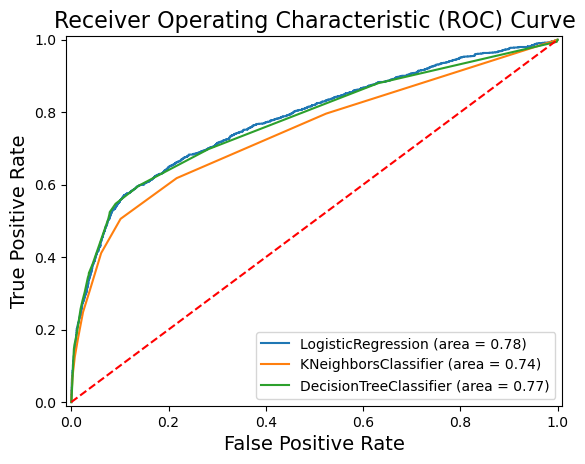

In [43]:
for model_name,best_model  in best_models:
    y_pred_prob = best_model.predict_proba(X_test)[:,1]
        # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(LabelEncoder().fit_transform(y_test), y_pred_prob)

        # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title(f'Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()       

confusion matrix for each model

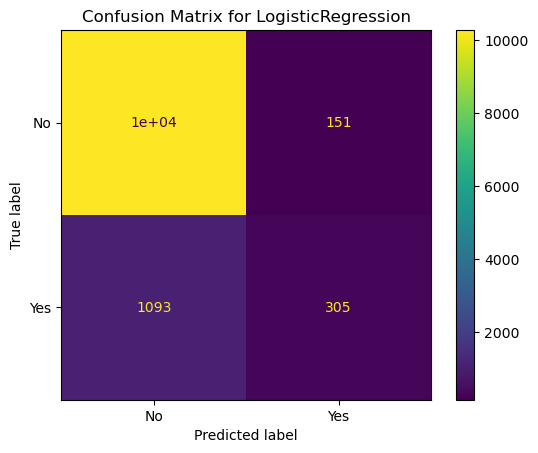

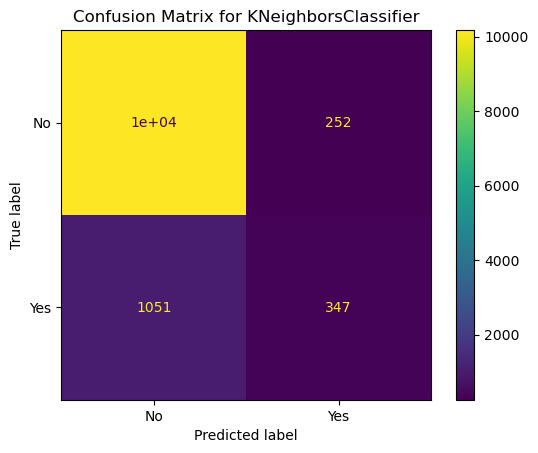

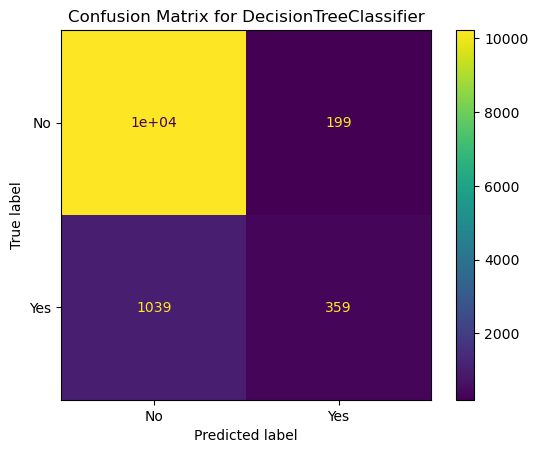

In [44]:
for model_name, best_model in best_models:
    y_pred = best_model.predict(X_test)
    cm  = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels = ['No', 'Yes'])
    disp.plot()
    # add title to the confusion matrix
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
  

## Results


To address our business challenge of predicting term subscription based on campaign performance, maximizing recall is crucial for boosting revenue. Therefore, selecting a model with high recall and minimizing false negatives is paramount. Consequently, we opted for the Logistic Model to enhance customer term deposit predictions.

The refined logistic model exhibits a improvement in recall compared to the baseline logistic model.

Despite the various classification reports generated by the model, they consistently indicate predominant classification of the majority class (0). This suggests potential for further model optimization or exploration of alternative unsupervised learning classification models.

Each false positive incurred by the bank translates into expenditure and diverts resources from other revenue-generating avenues. Conversely, false positives erode customer trust and may lead to customer attrition, compounding the loss.

False negatives pose the risk of missing out on potential customers, thereby reducing the bank's revenue potential.

For the marketing campaign, attracting more term deposit subscriptions is pivotal for revenue generation. Any customer loss resulting from the campaign's output—termed as customer churn—could severely impact the bank's bottom line. Therefore, minimizing false negatives is essential to mitigate this risk and sustain customer engagement.

## Recommendations

After analyzing the results and conducting exploratory data analysis, it's evident that certain features significantly influence customers' decisions to purchase term deposits. Here's a breakdown of the key features the bank should prioritize to attract more customers:

Duration: This feature emerges as one of the most influential factors, with longer call durations correlating to higher sales probabilities. To capitalize on this insight, the bank should focus on improving call quality by fostering rapport with customers, minimizing wait times, conducting follow-ups, and actively seeking customer feedback.

Age: Analysis indicates that the majority of term deposit purchases occur within the age range of 25 to 58 years. Therefore, the bank should concentrate its marketing efforts on targeting this demographic and allocate resources accordingly to attract more customers from this age group.

Campaign: The number of calls made during the current campaign is a crucial factor. However, customers generally prefer not to be inundated with excessive calls. Therefore, it's essential for the bank to strike a balance, typically between 1 to 5 calls, depending on individual customer interests. Training the sales team to discern customer preferences based on behavioral cues such as tone, voice modulation, and pitch can be beneficial in achieving this balance.

Euribo3: Higher interest rates tend to attract more customers, as evidenced by the data trend. The bank can leverage this insight by targeting age groups more likely to respond favorably to higher interest rates (e.g., 4.5-5%). Additionally, ramping up marketing efforts during periods of elevated interest rates can help attract more clients to term deposits.

nr.employed: The data suggests that a higher number of employees correlates with a greater number of customers. This underscores the importance of expanding the workforce to target more leads effectively and provide adequate follow-up and customer support. Establishing a dedicated after-sales team can further enhance customer satisfaction and retention.

By focusing on these key features and implementing targeted strategies, the bank can optimize its efforts to attract more customers and drive term deposit sales.

##### Questions